<a href="https://colab.research.google.com/github/Ayanp345/machine_learning_excercises/blob/main/statistical_distributions_and_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

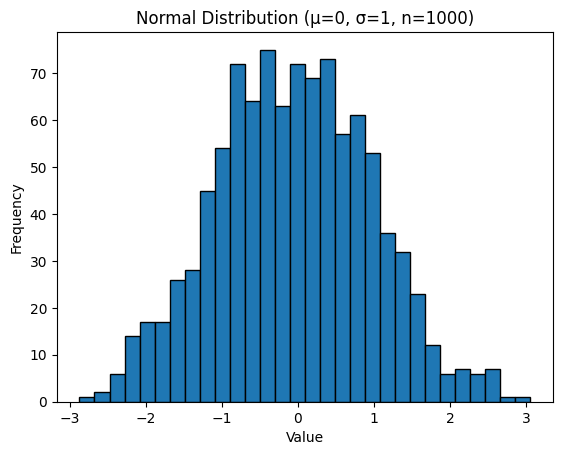

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
mu = 0
sigma = 1
sample = np.random.normal(mu, sigma, n)

plt.hist(sample, bins=30, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'Normal Distribution (μ={mu}, σ={sigma}, n={n})')
plt.show()

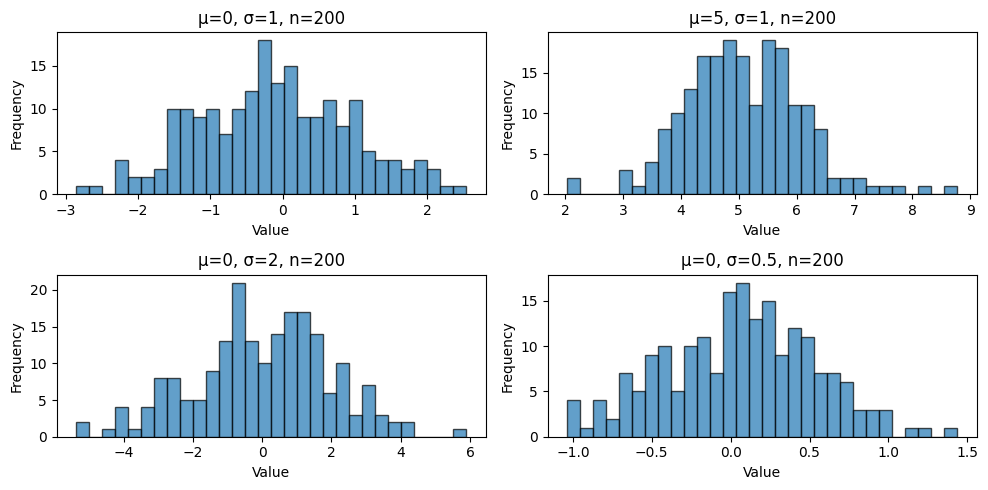

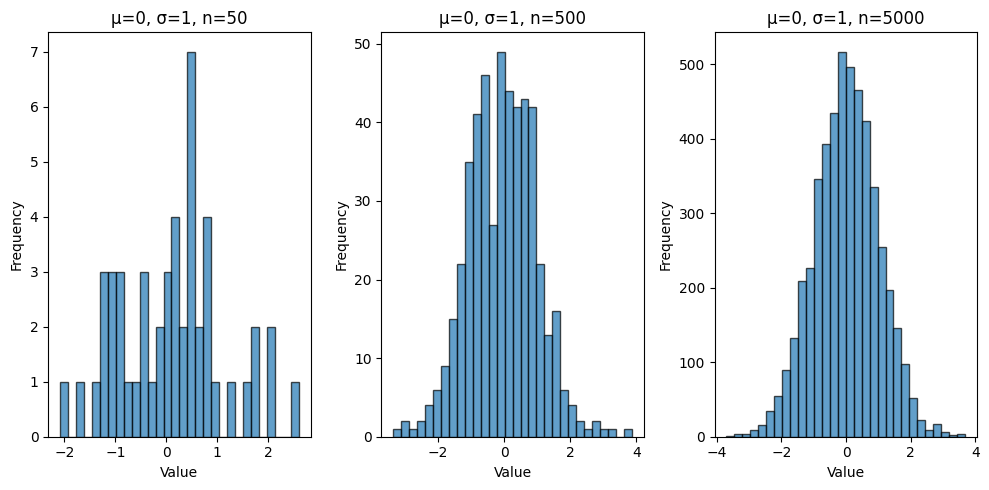

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_normal(mu, sigma, n, ax, title):
    sample = np.random.normal(mu, sigma, n)
    ax.hist(sample, bins=30, edgecolor='black', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')


plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plot_normal(mu=0, sigma=1, n=200, ax=plt.gca(), title="μ=0, σ=1, n=200")

plt.subplot(2, 2, 2)
plot_normal(mu=5, sigma=1, n=200, ax=plt.gca(), title="μ=5, σ=1, n=200")

# changing σ
plt.subplot(2, 2, 3)
plot_normal(mu=0, sigma=2, n=200, ax=plt.gca(), title="μ=0, σ=2, n=200")

plt.subplot(2, 2, 4)
plot_normal(mu=0, sigma=0.5, n=200, ax=plt.gca(), title="μ=0, σ=0.5, n=200")

plt.tight_layout()
plt.show()

#   changing n
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plot_normal(mu=0, sigma=1, n=50, ax=plt.gca(), title="μ=0, σ=1, n=50")

plt.subplot(1, 3, 2)
plot_normal(mu=0, sigma=1, n=500, ax=plt.gca(), title="μ=0, σ=1, n=500")

plt.subplot(1, 3, 3)
plot_normal(mu=0, sigma=1, n=5000, ax=plt.gca(), title="μ=0, σ=1, n=5000")

plt.tight_layout()
plt.show()

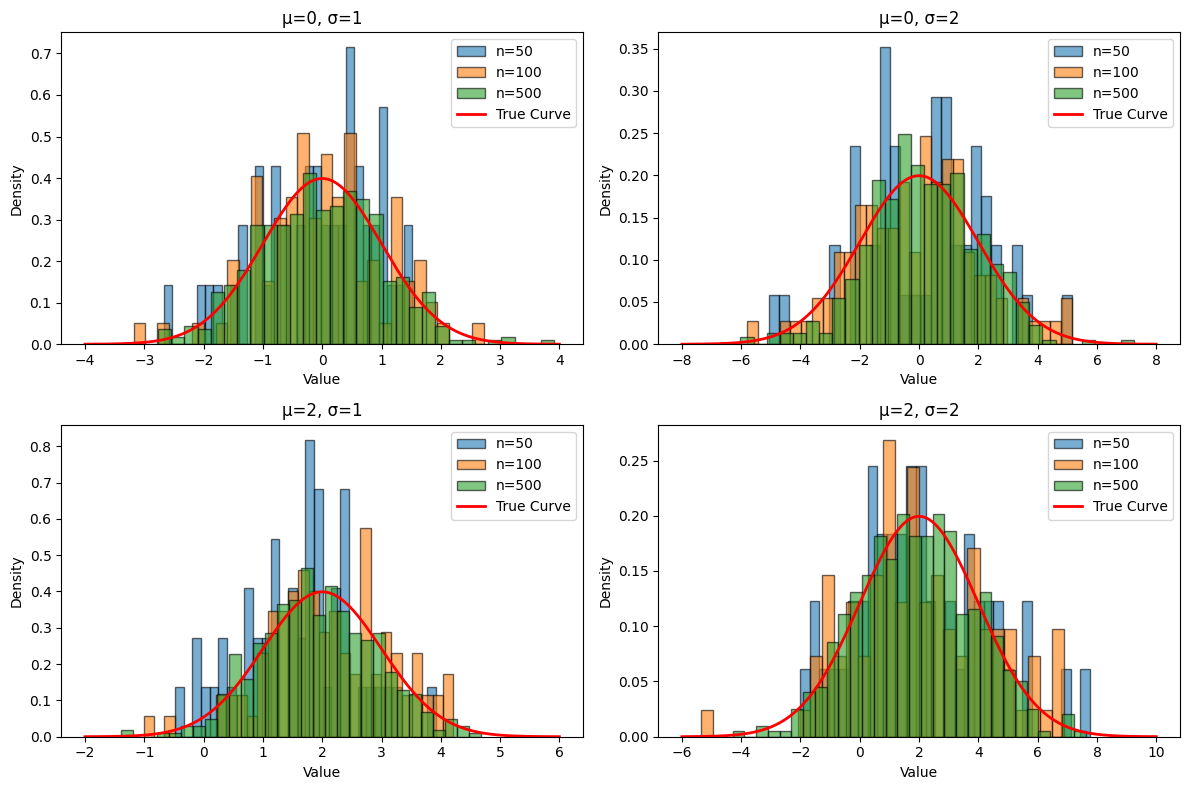

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mus = [0, 2]
sigmas = [1, 2]
sample_sizes = [50, 100, 500]

plt.figure(figsize=(12, 8))

for i, mu in enumerate(mus):
    for j, sigma in enumerate(sigmas):
        plt.subplot(len(mus), len(sigmas), i * len(sigmas) + j + 1)

        #  histograms for differ (n)
        for n in sample_sizes:
            sample = np.random.normal(mu, sigma, n)
            plt.hist(sample, bins=30, alpha=0.6, density=True, label=f'n={n}', edgecolor='black')

        #  true normal curve (for comparison)
        x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
        true_dist = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu)/sigma)**2)
        plt.plot(x, true_dist, 'r-', linewidth=2, label='True Curve')

        plt.title(f'μ={mu}, σ={sigma}')
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.legend()

plt.tight_layout()
plt.show()

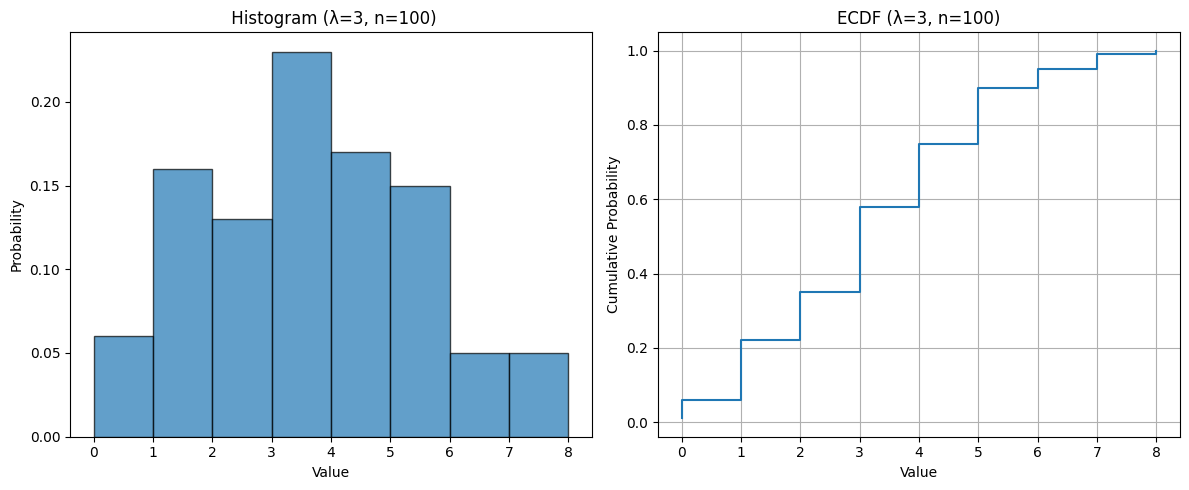

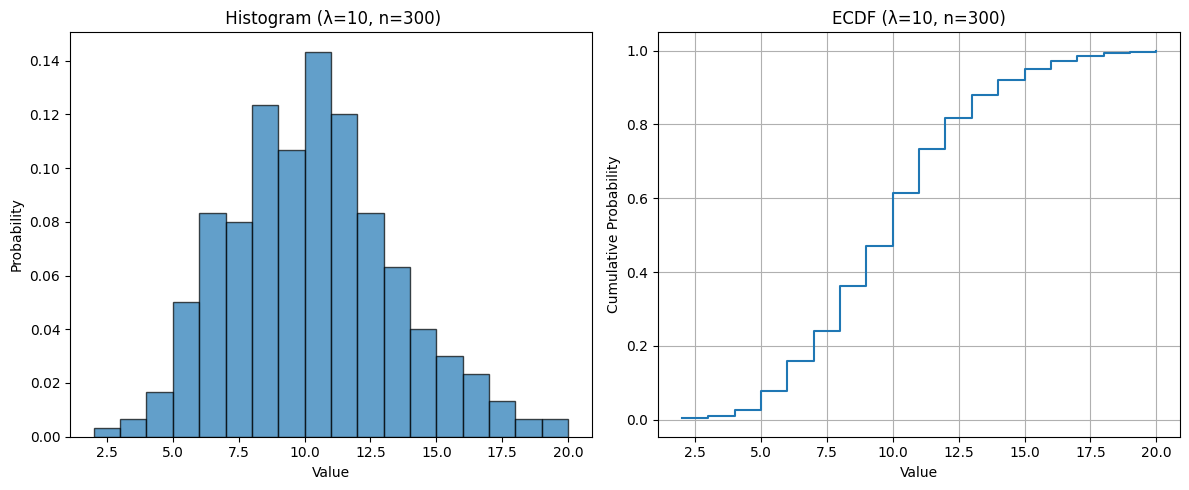

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_poisson_distribution(lam, n):

    sample = np.random.poisson(lam, n)

    plt.figure(figsize=(12, 5))

    # Plot histogram
    plt.subplot(1, 2, 1)
    plt.hist(sample, bins=np.arange(min(sample), max(sample) + 1, 1),
             density=True, alpha=0.7, edgecolor='black')
    plt.title(f' Histogram (λ={lam}, n={n})')
    plt.xlabel('Value')
    plt.ylabel('Probability')

    # Plot ECDF
    plt.subplot(1, 2, 2)
    x = np.sort(sample)
    y = np.arange(1, len(x) + 1) / len(x)
    plt.step(x, y, where='post')
    plt.title(f'ECDF (λ={lam}, n={n})')
    plt.xlabel('Value')
    plt.ylabel('Cumulative Probability')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_poisson_distribution(lam=3, n=100)

plot_poisson_distribution(lam=10, n=300)



True μ: 5.0000, Estimated μ: 4.9543
True σ: 2.0000, Estimated σ: 1.9154


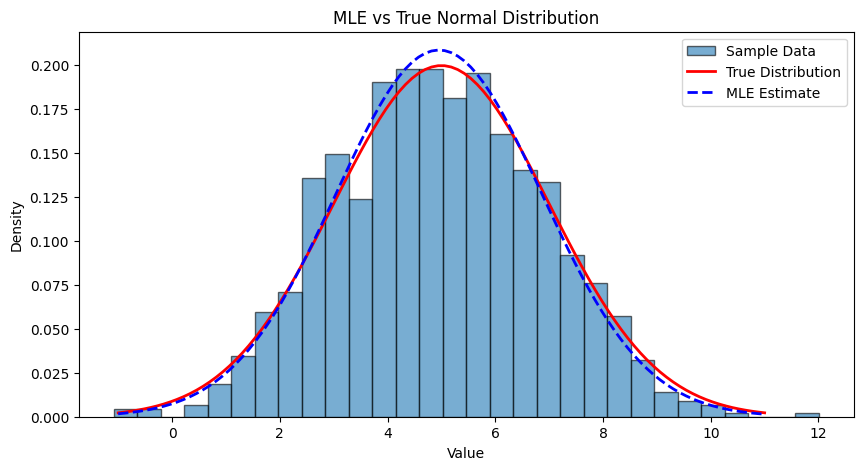

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def neg_log_likelihood(params, data):

    mu, sigma = params
    n = len(data)
    return n/2 * np.log(2 * np.pi * sigma**2) + 1/(2 * sigma**2) * np.sum((data - mu)**2)

def normal_mle(data):

    mu_init = np.mean(data)
    sigma_init = np.std(data)

    result = minimize(neg_log_likelihood, [mu_init, sigma_init], args=(data,),
                     bounds=((None, None), (1e-6, None)))  # σ > 0
    return result.x

true_mu, true_sigma = 5.0, 2.0
sample = np.random.normal(true_mu, true_sigma, 1000)
mu_hat, sigma_hat = normal_mle(sample)

print(f"True μ: {true_mu:.4f}, Estimated μ: {mu_hat:.4f}")
print(f"True σ: {true_sigma:.4f}, Estimated σ: {sigma_hat:.4f}")
#comparsion
plt.figure(figsize=(10, 5))
x = np.linspace(true_mu - 3*true_sigma, true_mu + 3*true_sigma, 100)
plt.hist(sample, bins=30, density=True, alpha=0.6, label='Sample Data', edgecolor='black')
plt.plot(x, 1/(true_sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - true_mu)/true_sigma)**2),
         'r-', lw=2, label='True Distribution')
plt.plot(x, 1/(sigma_hat * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu_hat)/sigma_hat)**2),
         'b--', lw=2, label='MLE Estimate')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.title('MLE vs True Normal Distribution')
plt.show()

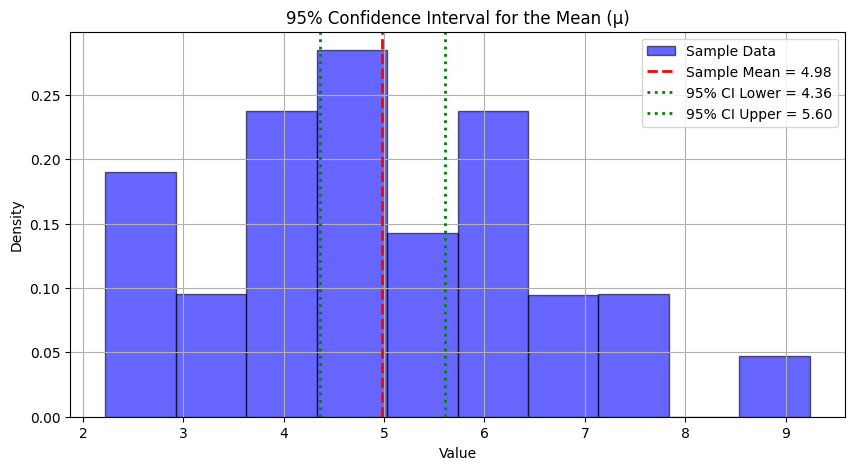

True μ: 5.00
Sample Mean: 4.98
95% CI: [4.36, 5.60]
Does the CI contain the true μ? Yes


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

def compute_confidence_interval(data, confidence=0.95):

    n = len(data)
    mean = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(n)
    ci_width = std_err * t.ppf((1 + confidence) / 2, df=n-1)
    return mean, mean - ci_width, mean + ci_width

true_mu, true_sigma = 5.0, 2.0
sample = np.random.normal(true_mu, true_sigma, 30)

# Compute 95% CI
mean, ci_lower, ci_upper = compute_confidence_interval(sample)

plt.figure(figsize=(10, 5))
plt.hist(sample, bins=10, density=True, alpha=0.6, color='blue', edgecolor='black', label='Sample Data')
plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Sample Mean = {mean:.2f}')
plt.axvline(ci_lower, color='green', linestyle=':', linewidth=2, label=f'95% CI Lower = {ci_lower:.2f}')
plt.axvline(ci_upper, color='green', linestyle=':', linewidth=2, label=f'95% CI Upper = {ci_upper:.2f}')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('95% Confidence Interval for the Mean (μ)')
plt.legend()
plt.grid(True)
plt.show()

print(f"True μ: {true_mu:.2f}")
print(f"Sample Mean: {mean:.2f}")
print(f"95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]")
print(f"Does the CI contain the true μ? {'Yes' if ci_lower <= true_mu <= ci_upper else 'No'}")

In [ ]:
import numpy as np
def sample_stats(data):

    n = len(data)
    mean = np.mean(data)
    variance = np.var(data, ddof=1)
    return mean, variance

np.random.seed(42)
uniform_sample = np.random.uniform(0, 1, 1000)

sample_mean, sample_var = sample_stats(uniform_sample)
theoretical_mean = 0.5
theoretical_var = 1/12

print(f"Sample Mean: {sample_mean:.4f} | Theoretical Mean: {theoretical_mean:.4f}")
print(f"Sample Variance: {sample_var:.4f} | Theoretical Variance: {theoretical_var:.4f}")
print(f"Mean Absolute Error: {abs(sample_mean - theoretical_mean):.4f}")
print(f"Variance Absolute Error: {abs(sample_var - theoretical_var):.4f}")

Sample Mean: 0.4903 | Theoretical Mean: 0.5000
Sample Variance: 0.0853 | Theoretical Variance: 0.0833
Mean Absolute Error: 0.0097
Variance Absolute Error: 0.0020


In [ ]:
def sample_expectation(data):
     return sum(data) / len(data)

def sample_variance(data):

    n = len(data)
    mean = sample_expectation(data)
    squared_deviations = [(x - mean) ** 2 for x in data]
    return sum(squared_deviations) / (n - 1)

import random
random.seed(42)
uniform_sample = [random.uniform(0, 1) for _ in range(1000)]

sample_mean = sample_expectation(uniform_sample)
sample_var = sample_variance(uniform_sample)

theoretical_mean = 0.5
theoretical_var = 1/12

# Print results
print(f"Sample Mean (Manual): {sample_mean:.4f} | Theoretical Mean: {theoretical_mean:.4f}")
print(f"Sample Variance (Manual): {sample_var:.4f} | Theoretical Variance: {theoretical_var:.4f}")
print(f"Mean Error: {abs(sample_mean - theoretical_mean):.4f}")
print(f"Variance Error: {abs(sample_var - theoretical_var):.4f}")

Sample Mean (Manual): 0.5126 | Theoretical Mean: 0.5000
Sample Variance (Manual): 0.0828 | Theoretical Variance: 0.0833
Mean Error: 0.0126
Variance Error: 0.0005
